In [133]:
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt 

#Read in the data
features = pd.read_csv('filtered_10.csv')
features.drop(['stop_sequence', 'route_id', 'Origin','Destination'], axis = 1, inplace = True)
features.head(5)

,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24,monday,tuesday,wednesday,thursday,friday,saturday,sunday,delay
0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0
1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1.0
2,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1.0
3,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1.0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1.0


In [134]:
features = features.dropna()
features.shape

(117, 16)

In [135]:
# Numpy to convert to arrays
import numpy as np


#Remove labels from features
# Axis 1 means colums
X = features.drop('delay', axis = 1)

# Saving features names for later use
feature_list = list(X.columns)

#Labels are values we want to predict
y = features['delay']



# Converting features to numpy array
#features = np.array(features)

print(feature_list)

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,
                                                    random_state = 42)



In [137]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [138]:
import numpy as np
from sklearn.metrics import mean_squared_error
# Testing data with the predict model
predictions = knn.predict(X_test)

# Calculation of absolute errors
errors = abs(predictions - y_test)

# Mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees')

Mean Absolute Error: 2.71 degrees


In [139]:
print(feature_list)

['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24', 'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday']


Intercept 21.05883825878945
Prediction_local [2.66024337]
Right: 1.0


C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\bhatt\AppData\Roaming\Python\Python311\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

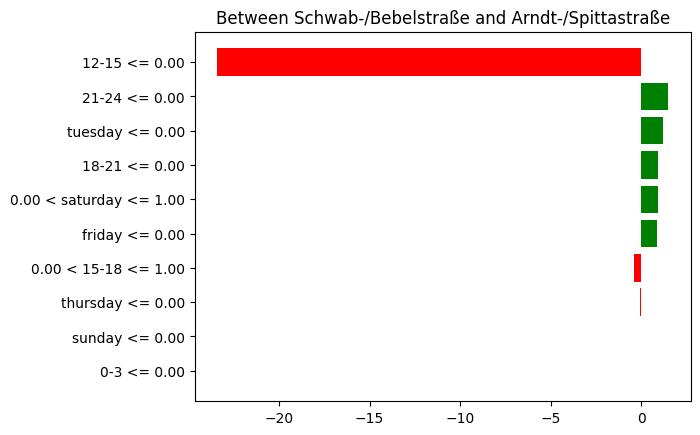

In [140]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names = feature_list,
                                                  class_names=['delay'], verbose=True, mode='regression')
exp = explainer.explain_instance(X_test.iloc[0], knn.predict)
exp.as_pyplot_figure()

plt.title('Between Schwab-/Bebelstraße and Arndt-/Spittastraße')
plt.show()

In [141]:

import shap

shap.initjs()

shap_explainer = shap.KernelExplainer(knn.predict, X_train)
# Use Explainer

In [142]:
sample = X_test
shap_values = shap_explainer.shap_values(sample)

  0%|          | 0/30 [00:00<?, ?it/s]

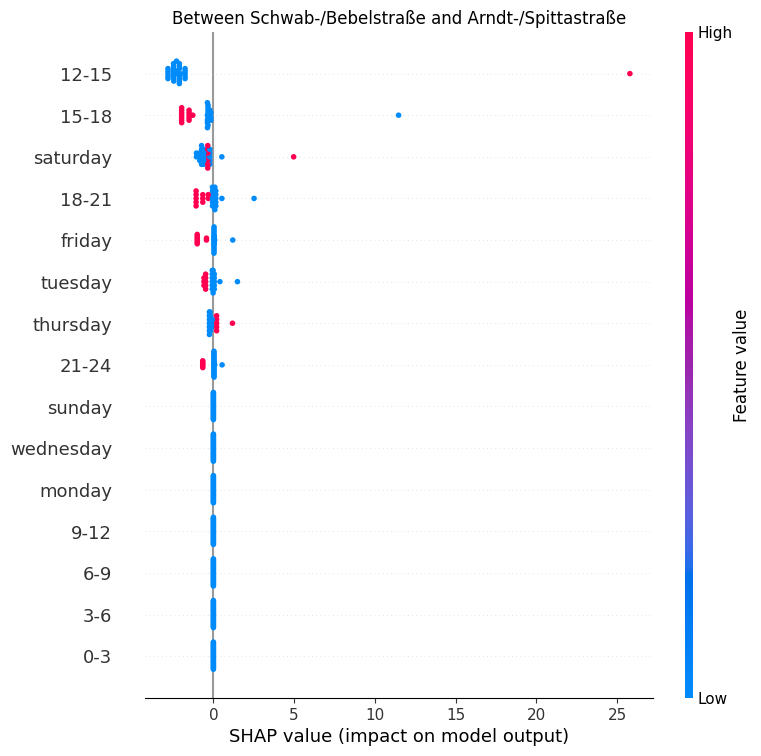

In [143]:
shap.summary_plot(shap_values, sample, show=False)
plt.title("Between Schwab-/Bebelstraße and Arndt-/Spittastraße")
plt.show()